# LETS FUCKING GO

## Reading in data + cleaning

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from keras import callbacks

from keras import models
from keras import layers
from keras import regularizers

from datetime import date

C:\Users\duckd\AppData\Local\Temp\ipykernel_9576\4181408151.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [19]:
## Importing dataset
tidyset = pd.read_csv("../data/tidyset.csv")
print(tidyset)

## droping irrelvant columns
set = tidyset.drop(["Unnamed: 0","county_name"], axis = 1)

set["datetime"] = pd.to_datetime(set["datetime"])
set["datetime"] = set["datetime"].apply(lambda x: x.toordinal())
print("With NAs: " + str(set.shape[0]))
set = set.dropna()
print("Without NAs: " + str(set.shape[0]))

       Unnamed: 0  data_block_id  county  product_type  is_business  \
0               1            576       0             0            1   
1               2            576       0             1            0   
2               3            576       0             1            1   
3               4            576       0             2            0   
4               5            576       0             2            1   
...           ...            ...     ...           ...          ...   
95846       95847            636      15             0            1   
95847       95848            636      15             1            0   
95848       95849            636      15             1            1   
95849       95850            636      15             3            0   
95850       95851            636      15             3            1   

                  datetime  prediction_unit_id   avg_temp   avg_dew  avg_rain  \
0      2023-03-31 00:00:00                   3  -3.516667 -5.36666

In [21]:
from sklearn.model_selection import train_test_split

X = set.drop(["ConsumptionTarget","ProductionTarget"], axis = 1)
y = set["ConsumptionTarget"] - set["ProductionTarget"]

x_means = np.mean(X,axis=0)
x_std = np.std(X,axis = 0)
x_total = (X - x_means)/x_std

y_means = np.mean(y,axis=0)
y_std = np.std(y,axis = 0)
y_total = (y - y_means)/y_std

X_train, X_test, y_train, y_test = train_test_split(x_total, y_total, test_size=0.2, random_state=42)


In [23]:
print(X_train.describe())
print(y_train.describe())

       data_block_id        county  product_type   is_business      datetime  \
count   75232.000000  75232.000000  75232.000000  75232.000000  75232.000000   
mean       -0.000622      0.001633      0.001204      0.001281     -0.000622   
std         1.001555      1.001099      0.999509      0.999896      1.001555   
min        -1.717421     -1.493512     -1.699219     -1.089135     -1.717421   
25%        -0.857218     -0.873267     -0.786217     -1.089135     -0.857218   
50%         0.002986     -0.046272      0.126785      0.918160      0.002986   
75%         0.863189      0.780722      1.039788      0.918160      0.863189   
max         1.723393      1.607717      1.039788      0.918160      1.723393   

       prediction_unit_id      avg_temp       avg_dew      avg_rain  \
count        75232.000000  75232.000000  75232.000000  75232.000000   
mean             0.003140     -0.002934     -0.002268     -0.000942   
std              1.000527      1.000516      1.001312      0.99882

## Regression task

In [24]:
optimizer="rmsprop"
loss_function="MeanSquaredError" 
learning_rate=0.01

def build_model():
    global model
    model = models.Sequential()

    #ADD LAYERS
    model.add(layers.Dense(100, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dropout(rate = .01))
    model.add(layers.Dense(10, activation='relu', bias_regularizer=regularizers.l1_l2(l1=.0001, l2 = .0001)))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(1,  activation='linear'))

    #COMPILATION (i.e. choose optimizer, loss, and metrics to monitor)
    model.compile(optimizer=optimizer,
                    loss=loss_function,
                    metrics=['RootMeanSquaredError'])
    
build_model()

In [25]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               2700      
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
 dense_12 (Dense)            (None, 5)                 55        
                                                                 
 dense_13 (Dense)            (None, 1)                 6         
                                                                 
Total params: 3,771
Trainable params: 3,771
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/50
2026/2026 [==============================] - 6s 3ms/step - loss: 0.0669 - root_mean_squared_error: 0.2565 - val_loss: 0.0858 - val_root_mean_squared_error: 0.2909
Epoch 2/50
2026/2026 [==============================] - 6s 3ms/step - loss: 0.0648 - root_mean_squared_error: 0.2524 - val_loss: 0.0666 - val_root_mean_squared_error: 0.2558
Epoch 3/50
2026/2026 [==============================] - 5s 3ms/step - loss: 0.0633 - root_mean_squared_error: 0.2493 - val_loss: 0.0651 - val_root_mean_squared_error: 0.2529
Epoch 4/50
2026/2026 [==============================] - 5s 3ms/step - loss: 0.0650 - root_mean_squared_error: 0.2528 - val_loss: 0.0678 - val_root_mean_squared_error: 0.2582
Epoch 5/50
2026/2026 [==============================] - 5s 3ms/step - loss: 0.0633 - root_mean_squared_error: 0.2493 - val_loss: 0.0649 - val_root_mean_squared_error: 0.2524
Epoch 6/50
2026/2026 [==============================] - 6s 3ms/step - loss: 0.0624 - root_mean_squared_error: 0.2475 - val_loss: 0

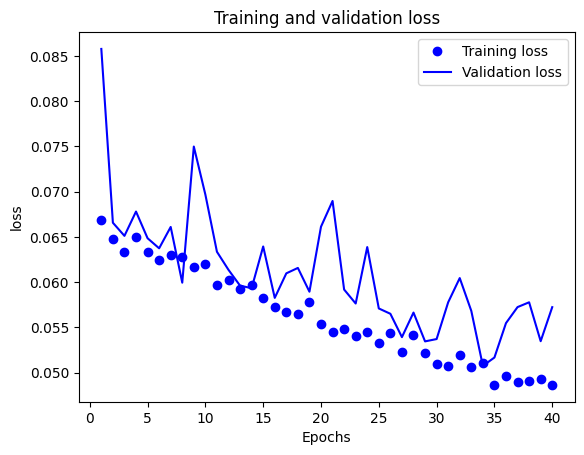

In [28]:
callback = callbacks.EarlyStopping(monitor='loss', patience=5, verbose=10)

#TRAIN
epochs=50
history = model.fit(X_train, y_train, validation_split=0.3, epochs=epochs, callbacks=[callback], batch_size=X_train.shape[1])
history_dict = history.history

## THE FUNCTION THAT IS BEING PLOTTED
def plot_history(quantity="loss"):
    # PLOTTING THE TRAINING AND VALIDATION LOSS 
    history_dict = history.history
    loss_values = history_dict[quantity]
    val_loss_values = history_dict["val_"+quantity]
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, "bo", label="Training "+quantity)
    plt.plot(epochs, val_loss_values, "b", label="Validation "+quantity)
    plt.title("Training and validation "+quantity)
    plt.xlabel("Epochs")
    plt.ylabel(quantity)
    plt.legend()
    plt.show()

plot_history("loss")

## Classification task

In [29]:
X = set.drop(["is_business"], axis = 1)
y_total = set["is_business"]

x_means = np.mean(X,axis=0)
x_std = np.std(X,axis = 0)
x_total = (X - x_means)/x_std

X_train, X_test, y_train, y_test = train_test_split(x_total, y_total, test_size=0.2, random_state=42)

In [33]:
optimizer="adam"
loss_function="binary_crossentropy" 
learning_rate=0.01

def build_model():
    global model
    model = models.Sequential()

    #ADD LAYERS
    model.add(layers.Dense(100, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dropout(rate = .01))
    model.add(layers.Dense(10, activation='relu', bias_regularizer=regularizers.l1_l2(l1=.0001, l2 = .0001)))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(1,  activation='sigmoid'))

    #COMPILATION (i.e. choose optimizer, loss, and metrics to monitor)
    model.compile(optimizer=optimizer,
                    loss=loss_function,
                    metrics=['accuracy'])
    
build_model()

Epoch 1/10
1951/1951 [==============================] - 5s 3ms/step - loss: 0.1785 - accuracy: 0.9202 - val_loss: 0.0827 - val_accuracy: 0.9688
Epoch 2/10
1951/1951 [==============================] - 5s 2ms/step - loss: 0.0530 - accuracy: 0.9801 - val_loss: 0.0386 - val_accuracy: 0.9860
Epoch 3/10
1951/1951 [==============================] - 5s 2ms/step - loss: 0.0342 - accuracy: 0.9876 - val_loss: 0.0165 - val_accuracy: 0.9947
Epoch 4/10
1951/1951 [==============================] - 5s 2ms/step - loss: 0.0250 - accuracy: 0.9906 - val_loss: 0.0126 - val_accuracy: 0.9964
Epoch 5/10
1951/1951 [==============================] - 5s 2ms/step - loss: 0.0191 - accuracy: 0.9931 - val_loss: 0.0129 - val_accuracy: 0.9962
Epoch 6/10
1951/1951 [==============================] - 5s 2ms/step - loss: 0.0143 - accuracy: 0.9951 - val_loss: 0.0067 - val_accuracy: 0.9981
Epoch 7/10
1951/1951 [==============================] - 5s 2ms/step - loss: 0.0119 - accuracy: 0.9959 - val_loss: 0.0155 - val_accuracy:

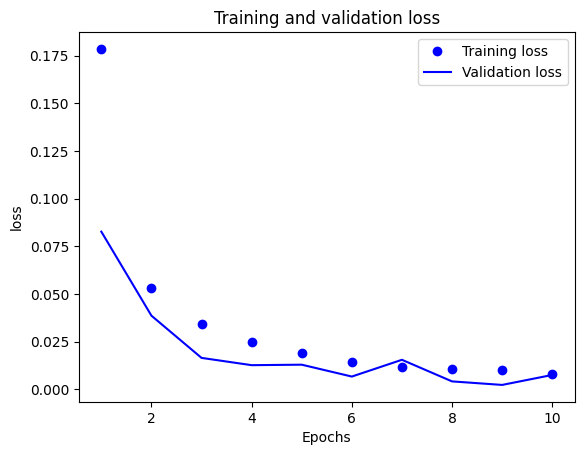

In [34]:
callback = callbacks.EarlyStopping(monitor='loss', patience=5, verbose=10)

#TRAIN
epochs=10
history = model.fit(X_train, y_train, validation_split=0.3, epochs=epochs, callbacks=[callback], batch_size=X_train.shape[1])
history_dict = history.history

plot_history("loss")